# Kaggle_Titanic

>高级编程技术期末大作业实验报告
>
>姓名：刘泳杅	学号：17341113
>
>姓名：廖浩淳	学号：17341096'
>
>日期：2019年6月28日
>
>网址：https://www.kaggle.com/c/titanic

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4h2lz9qsqj30hs0dct9r.jpg"/>

## 问题初探 

### 分析问题

		泰坦尼克号的沉没是历史上最臭名昭著的沉船事件之一。1912年4月15日，泰坦尼克号在处女航中与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，并导致了更好的船舶安全规则。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。尽管在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来，如妇女、儿童和上层阶级。
		在这个挑战中，我们要求您分析哪些人可能存活。特别是，我们要求您应用机器学习工具来预测哪些乘客在悲剧中幸存下来。

### 导入数据

导入实验数据和必要的库，这次试验主要用到的科学计算库是numpy和pandas，用到的绘图库是matplotlib和seaborn

In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

利用pandas库的read_csv直接将训练集和测试集导入程序，并把PassengerId保存起来

In [87]:
train = pd.read_csv(r'.\data\train.csv')
test = pd.read_csv(r'.\data\test.csv')
PassengerId = test['PassengerId']

## 数据分析

### 总体预览

我们先总体观察一下整个数据集。

训练集有891项数据，每项数据包含12个特征。

测试集有418项数据，每项数据包含11个特征。

In [88]:
print ('train.shape: ', train.shape)
print ('test.shape: ', test.shape)

train.shape:  (891, 12)
test.shape:  (418, 11)


我们再把训练集的前五个元素打印出来看一下

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


我们再打印一下整体信息

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上可见，数据集包含12个变量

- PassengerId 整型变量，标识乘客的ID，递增变量，对预测无帮助
- Survived 整型变量，标识该乘客是否幸存。0表示遇难，1表示幸存。
- Pclass 整型变量，标识乘客的社会-经济状态，1代表Upper，2代表Middle，3代表Lower
- Name 字符型变量，除包含姓和名以外，还包含Mr. Mrs. Dr.这样的具有西方文化特点的信息
- Sex 字符型变量，标识乘客性别
- Age 整型变量，标识乘客年龄，有缺失值
- SibSp 整型变量，代表兄弟姐妹及配偶的个数。其中Sib代表Sibling也即兄弟姐妹，Sp代表Spouse也即配偶
- Parch 整型变量，代表父母或子女的个数。其中Par代表Parent也即父母，Ch代表Child也即子女
- Ticket 字符型变量，代表乘客的船票号
- Fare 数值型，代表乘客的船票价
- Cabin 字符型，代表乘客所在的舱位，有缺失值
- Embarked 字符型，代表乘客登船口岸，有缺失值

进一步研究我们得到这样的信息
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gyfmhp6cj30ee06vt95.jpg"/>
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gygoi9q3j30b606jdfx.jpg"/>
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gygohglzj308o08it8o.jpg"/>

In [91]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 初步分析

首先我们看一看幸存的相对数量

In [92]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**接下来，我们想观察一下各项特征与幸存率的关系，通过绘制直方图可以观察到这种关系。**

性别特征：观察性别与幸存的关系，女性幸存率远高于男性,印证电影里面那句"Lady and chirdren go first."

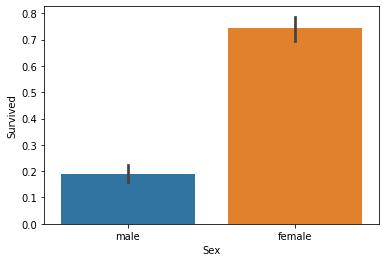

In [93]:
sns.barplot(x="Sex", y="Survived", data=train)

地位特征：观察船舱等级与幸存的关系，发现社会地位越高的人幸存率越高

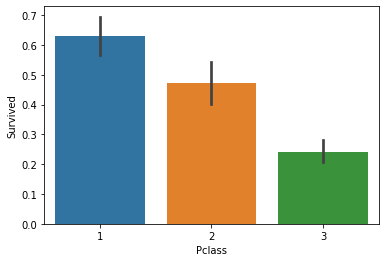

In [94]:
sns.barplot(x="Pclass", y="Survived", data=train)

我们找来了，当时泰坦尼克号的设计图纸，由于船头撞向冰山，船头开始下沉，船身逐渐倾斜，船尾翘起脱离海面；船头沉没1/3时，受自重的影响，船身从中间开始断裂；船尾掉入海中，和船头一起沉没。最终处在中间位置的一等舱程客更有可能幸存
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gzrr42m1j30hb061wf2.jpg"/>

同辈特征：观察配偶及兄弟姐妹数与幸存的关系，配偶及兄弟姐妹数适中的乘客幸存率更高

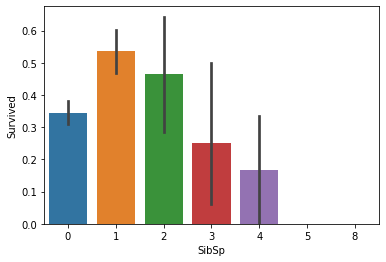

In [95]:
sns.barplot(x="SibSp", y="Survived", data=train)

不同辈特征：观察父母与子女数与幸存的关系，父母与子女数适中的乘客幸存率更高

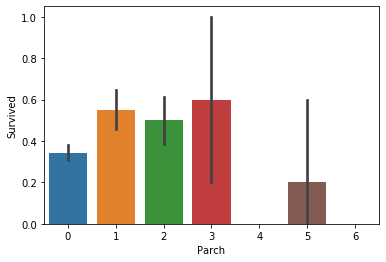

In [96]:
sns.barplot(x="Parch", y="Survived", data=train)

登船口特征：观察登港港口与幸存的关系，C地的生存率更高

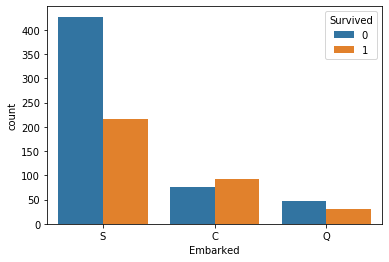

In [97]:
sns.countplot('Embarked',hue='Survived',data=train)

我找来了地图，并标记上SQC三点和泰坦尼克号的失事地点,C点在法国，猜测有可能是C点销售的一等舱的票比较多
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gzrr3desj30ha06lq3h.jpg"/>

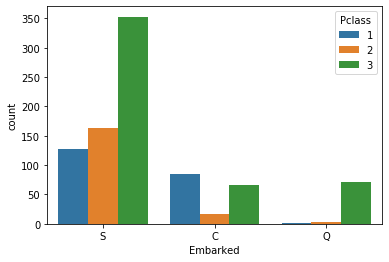

In [98]:
sns.countplot('Embarked',hue='Pclass',data=train)

果不其然，C点销售的一等舱的票数占比是最高的，因此我们猜测登船地点这个特征应该是反映在社会地位上了

我们再绘制出年龄与幸存率的关系图，从不同生还情况的密度图可以看出，年龄小于12岁的程客幸村率有较大幅度的提高，这也印证了那句"Lady and children go first."的台词

Text(12.359751157407416, 0.5, 'density')

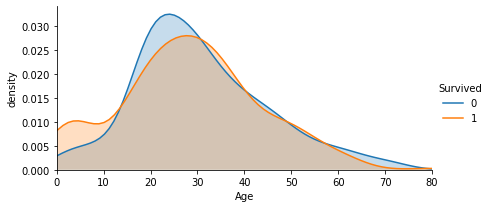

In [99]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

我们再绘制出票价与幸存率的关系图，从生还情况密度图，在票价大于三十时生还的概率比死亡的要高，因此可以把票价较高的个体分离出来当作特征。

Text(12.359751157407416, 0.5, 'density')

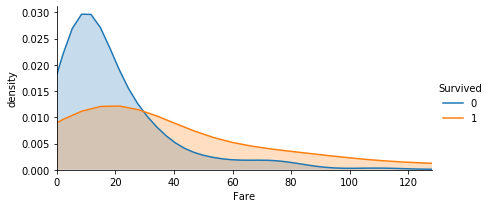

In [100]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()/4))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

还可以看出对于票价超高（高于150）的程客来说，生还的概率很大

Text(6.109751157407416, 0.5, 'density')

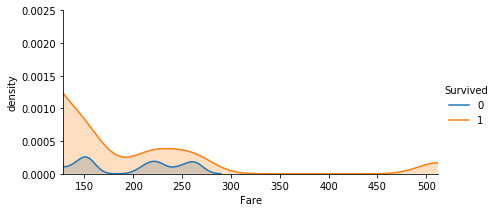

In [101]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(train['Fare'].max()/4, train['Fare'].max()), ylim=(0, 0.0025))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

## 特征工程

特征都观察得差不多之后，我们接着做特征工程。

### 新增特征

首先将训练集和测试集合并一起进行操作。

In [102]:
all_data = pd.concat([train, test], ignore_index=True)

观察合并后的all_data前五项数据

In [103]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


我们目前无法运用姓名这一特征，所以想加入一个头衔特征，从英文名的称谓反应这个人的社会地位。

新增Title特征，从姓名中提取乘客的称呼，归纳为六类。

In [104]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

观察提取出的头衔，并将头衔归纳成六类

In [105]:
set(all_data['Title'])

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [106]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


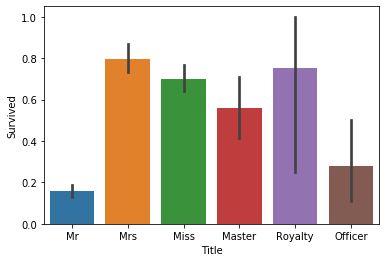

In [107]:
# 将称呼分类
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)

观察到头衔称呼为"Mrs", "Miss", "Master", "Royalty"存活率会比较高，这些都是女性和社会地位高的人。

In [108]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


现在的sibsp和parch特征都不能很好的反应家庭成员数，家庭成员人数也要作为一个特征，所以我们新增一个FamilyLabel特征。

首先计算家庭总人数：Parch+SibSp+1

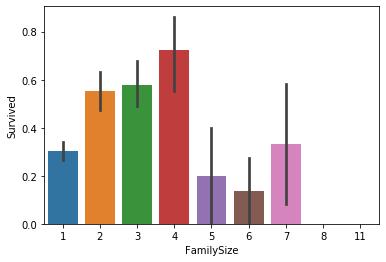

In [109]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data)

按生存率把FamilySize分为三类，构成FamilyLabel特征。

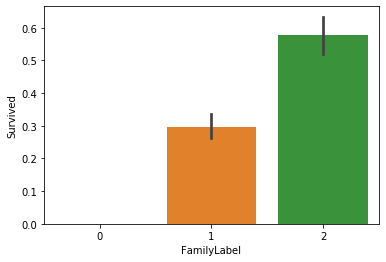

In [110]:
def Fam_label(s):
    if s in [2, 3, 4]:
        return 2
    elif s in [1, 5, 6, 7]:
        return 1
    else:
        return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)

Cabin缺失值太多，我们猜测有些程客确实没有舱位，他们可能就在甲板上活动，或者说由于没有幸存下来导致难以获得小舱号；

因此我们首先将缺失值用Unknown填充Cabin的缺失值，然后取出第一个字母作为新增的甲板号

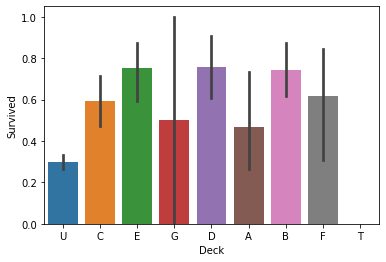

In [111]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)

团体票：我们在观察数据的时候发现有多人共用一张票的现象，猜测应该是多人购买了团体票，因此我们将票号一样的分别提取出来，观察几人成团会有更高的存活率。

In [112]:
Ticket_Count = dict(all_data['Ticket'].value_counts())

In [113]:
print(Ticket_Count['CA. 2343'])
print(Ticket_Count['CA 2144'])
print(Ticket_Count['W./C. 6608'])

11
8
5


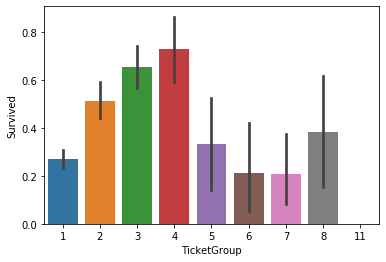

In [114]:
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

我们发现2至4人共票号的乘客幸存率较高，因此我们将团体票人数分成三种类型

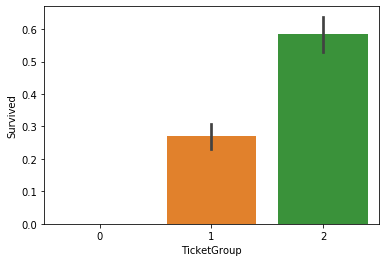

In [115]:
def Ticket_Label(s):
    if s in [2, 3, 4]:
        return 2
    elif s in [1, 5, 6, 7, 8]:
        return 1
    else:
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

### 缺失值填充

**新增了一些特征之后我们要进行缺失值填充**

其中
1. Embarked和Fare缺失值较少，使用众数填充
2. Age缺失值不多不少，我们使用随机森林回归模型进行预测

Embarked缺失量为2，我们首先观察确实项的特征。

In [116]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


缺失Embarked信息的乘客的Pclass均为1，且Fare均为80

In [117]:
all_data.groupby(by=["Embarked", "Pclass"]).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

因为Embarked为C且Pclass为1的乘客的Fare中位数为77，最接近80，所以我们将缺失值填充为C。

In [118]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

测试集中有一个Fare的缺失项，我们先将其打印出来。

In [119]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


观察到此乘客是从S口登船的三等舱程客，我们找到从S口登船的三等舱程客票价的中位数进行缺失值填充。

In [120]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

最难填充的是Age，确实量适中，我们用Sex, Title, Pclass, Embarked, Fare五个特征构建随机森林模型，填充年龄缺失值。

In [121]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title', 'Embarked', 'Fare']]

In [122]:
age_df.head()

,Age,Pclass,Sex,Title,Embarked,Fare
0,22.0,3,male,Mr,S,7.2500
1,38.0,1,female,Mrs,C,71.2833
2,26.0,3,female,Miss,S,7.9250
3,35.0,1,female,Mrs,S,53.1000
4,35.0,3,male,Mr,S,8.0500


进行one hot编码，使数据易于利用

In [123]:
# one_hot编码, 独热编码
age_df = pd.get_dummies(age_df)

In [124]:
age_df.head()

,Age,Pclass,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,7.2500,0,1,0,0,1,0,0,0,0,0,1
1,38.0,1,71.2833,1,0,0,0,0,1,0,0,1,0,0
2,26.0,3,7.9250,1,0,0,1,0,0,0,0,0,0,1
3,35.0,1,53.1000,1,0,0,0,0,1,0,0,0,0,1
4,35.0,3,8.0500,0,1,0,0,1,0,0,0,0,0,1


将已知与未知分离，又已知预测未知

In [125]:
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
X_known = known_age[:, 1:]
y_known = known_age[:, 0]
X_unknown = unknown_age[:, 1:]
y_unknown = unknown_age[:, 0]

然后进行数据归一化，使数据无量纲化

In [126]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_known)
X_known = standardScaler.transform(X_known)
X_unknown = standardScaler.transform(X_unknown)

In [127]:
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X_known, y_known)
predictedAges = rfr.predict(X_unknown)
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

### 同组识别

把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。

In [128]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())

In [129]:
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])

In [130]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup,Surname,FamilyGroup
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,U,1,Braund,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2,Cumings,2
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,U,1,Heikkinen,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2,Futrelle,2
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,U,1,Allen,2


In [131]:
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

In [132]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

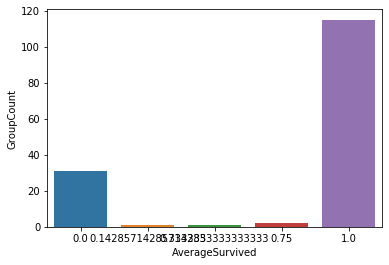

In [133]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')

绝大部分成年男性组的平均存活率也为1或0。

In [134]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


### 离群点处理

因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为0的组设置为遇难组，把成年男性组中存活率为1的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高。

In [135]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Ilmakangas', 'Canavan', 'Caram', 'Skoog', 'Strom', 'Sage', 'Rosblom', 'Ford', 'Palsson', 'Cacic', 'Olsson', 'Zabour', 'Danbom', 'Panula', 'Bourke', 'Turpin', 'Rice', 'Attalah', 'Lobb', 'Van Impe', 'Barbara', 'Boulos', 'Jussila', 'Vander Planke', 'Oreskovic', 'Robins', 'Johnston', 'Goodwin', 'Lahtinen', 'Lefebre', 'Arnold-Franchi'}
{'Chambers', 'Beckwith', 'Kimball', 'Cardeza', 'Greenfield', 'Bishop', 'Harder', 'Daly', 'Goldenberg', 'Frolicher-Stehli', 'Frauenthal', 'Bradley', 'Duff Gordon', 'McCoy', 'Nakid', 'Taylor', 'Jussila', 'Dick', 'Jonsson', 'Beane'}


为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。

In [136]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

### 特征转换
选取特征，转换为数值变量，划分训练集和测试集。

In [137]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup,Surname,FamilyGroup
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,U,1,Braund,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2,Cumings,2
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,U,1,Heikkinen,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2,Futrelle,2
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,U,1,Allen,2


In [138]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel', 'Deck', 'TicketGroup']]

In [139]:
all_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyLabel,Deck,TicketGroup
0,0.0,3,male,22.0,7.2500,S,Mr,2,U,1
1,1.0,1,female,38.0,71.2833,C,Mrs,2,C,2
2,1.0,3,female,26.0,7.9250,S,Miss,1,U,1
3,1.0,1,female,35.0,53.1000,S,Mrs,2,C,2
4,0.0,3,male,35.0,8.0500,S,Mr,1,U,1


In [140]:
all_data=pd.get_dummies(all_data)

In [141]:
all_data.head()

,Survived,Pclass,Age,Fare,FamilyLabel,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


将训练集与测试集分离

In [142]:
train=all_data[all_data['Survived'].notnull()]
X_test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X_train = train.as_matrix()[:,1:]
y_train = train.as_matrix()[:,0]

## 建模和优化

### 数据归一化

In [143]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

### PCA降维

In [144]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [145]:
pca.n_components_

15

In [146]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### 参数优化

使用网格搜索寻找最优的随机森林参数n_estimators和max_depth

In [147]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'max_depth': list(range(3,15)),
        'n_estimators': list(range(20, 45)), 
        'max_leaf_nodes': (2, 4, 8, 16, 32, 64, 128),
    }
]

ran_clf = RandomForestClassifier(random_state = 10, max_features = 'sqrt')

gsearch = GridSearchCV(estimator=ran_clf, param_grid = param_grid, 
                       scoring='roc_auc', n_jobs=-1, verbose=1)

gsearch.fit(X_train,y_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 826 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 1526 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3526 tasks      | elapsed:  1.5min


Wall time: 1min 38s


[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed:  1.6min finished


In [148]:
print('Best classify max_depth is ', gsearch.best_params_['max_depth'])
print('Best classify n_estimators is ', gsearch.best_params_['n_estimators'])
print('Best classify max_leaf_nodes is ', gsearch.best_params_['max_leaf_nodes'])
print('Best score is ', gsearch.best_score_)

Best classify max_depth is  6
Best classify n_estimators is  30
Best classify max_leaf_nodes is  32
Best score is  0.8714888313680377


### 训练模型

In [149]:
best_clf = gsearch.best_estimator_
best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=32,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

### 交叉验证

In [150]:
from sklearn import model_selection, metrics
cv_score = model_selection.cross_val_score(best_clf, X_train, y_train)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8271605 | Std - 0.0255439 


### 预测

In [151]:
y_predict = best_clf.predict(X_test)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_predict.astype(np.int32)})
submission.to_csv(r".\output\submission1.csv", index=False)